In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def sample_from_logreg(p=20, n=500, seed=984):
    np.random.seed(seed)
    X = np.random.normal(0, 1, size=(n, p))  # sample (n, p) from standard normal

    theta_star = np.zeros(p).reshape(-1, 1)
    non_zero = p//2
    for i in np.random.choice(p, non_zero):
        theta_star[i] = np.random.normal(0, 1)

    probs = np.exp(X @ theta_star) / (np.exp(X @ theta_star) + 1)
    y = np.zeros(n)

    for i in range(0, n):
        y[i] = np.random.binomial(1, probs[i])

    return (X, theta_star, y)

In [4]:
def l(X, y, theta):
    return -y @ np.log(sigmoid(X @ theta)) - (1 - y) @ np.log(1 - sigmoid(X @ theta))

In [5]:
def nabla_l(X, y, theta):
    return -X.T @ y + (X.T @ sigmoid(X @ theta)).ravel()

In [6]:
def nabla_l_i(X, y, theta):
    return -X * y + X * sigmoid(X @ theta)

In [7]:
def hess_l(X, y, theta):
    return (X.T * (sigmoid(X @ theta) * (1 - sigmoid(X @ theta))) @ X)

In [8]:
n = 300
p = 50
X, theta_star, y = sample_from_logreg(p=p, n=n)

In [9]:
def experiment(update_rule, n_iter=50, **kwargs):
    theta = np.zeros(p)
    losses = np.zeros(n_iter)
    losses[0] = l(X, y, theta)
    for i in range(n_iter):
        losses[i] = l(X, y, theta)
        theta = update_rule(X, y, theta, **kwargs)
    return losses

In [10]:
n_iter = 50

In [11]:
def gd_update(X, y, theta, eta=0.01):
    return theta - eta * nabla_l(X, y, theta)

gd_loss = experiment(gd_update, n_iter=n_iter)

In [12]:
def ns_update(X, y, theta):
    return theta - (np.linalg.inv(hess_l(X, y, theta)) @ nabla_l(X, y, theta))

ns_loss = experiment(ns_update, n_iter=n_iter)

In [13]:
def sgd_update(X, y, theta, eta=0.01):
    idxs = np.random.choice(X.shape[0], size=X.shape[0])
    for i in idxs:
        theta -= eta * nabla_l_i(X[i], y[i], theta)
    return theta 

sgd_loss = experiment(sgd_update, n_iter=n_iter)

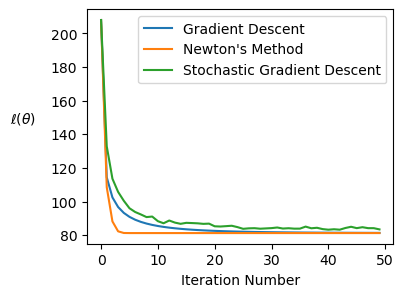

In [16]:
fig, ax = plt.subplots()
ax.plot(gd_loss, label="Gradient Descent")
ax.plot(ns_loss, label="Newton's Method")
ax.plot(sgd_loss, label="Stochastic Gradient Descent")
ax.set_ylabel('$\ell(\\theta)$', rotation=0, labelpad=20)
ax.set_xlabel('Iteration Number')
#ax.set_xscale('log')
ax.legend()
ws = 1.45
hs = 1.15
fig.set_size_inches(w=5.73/ws, h=3.5/hs)